In [2]:
# Import Modules

import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# Read in the data

production_df = pd.read_csv('../datasets/Meat_Stats_Meat_Production.csv')

In [50]:
#Process columns for easier plotting

production_df['Production'] = production_df['Production'].replace(',', '', regex=True).astype(float)

production_df['Date'] = pd.to_datetime(production_df['Date'], format='%b-%Y')

is_red_meat = (production_df['Type of Meat']=='Red Meat')
red_meat = production_df[is_red_meat]

is_poultry = (production_df['Type of Meat']=='Poultry')
poultry = production_df[is_poultry]

red_meat = red_meat.groupby(red_meat['Date'].dt.year)['Production'].sum().reset_index()
poultry = poultry.groupby(poultry['Date'].dt.year)['Production'].sum().reset_index()


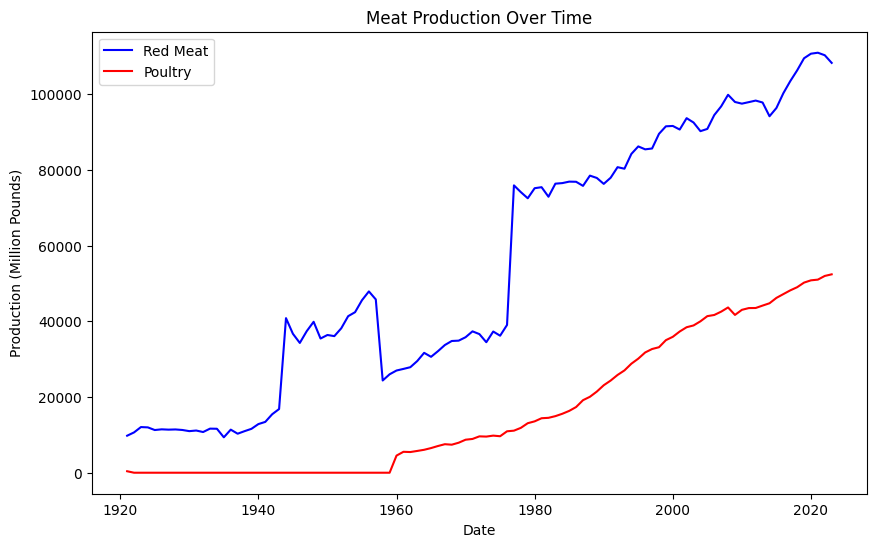

In [54]:

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(red_meat['Date'], red_meat['Production'], linestyle='-', color='b', label='Red Meat')
plt.plot(poultry['Date'], poultry['Production'], linestyle='-', color='r', label='Poultry')


# Adding titles and labels
plt.title('Meat Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production (Million Pounds)')
plt.legend()
plt.savefig('Meat Production.png')
plt.show()
